In [ ]:
%load_ext autoreload
%autoreload 2

Non-augmented images:


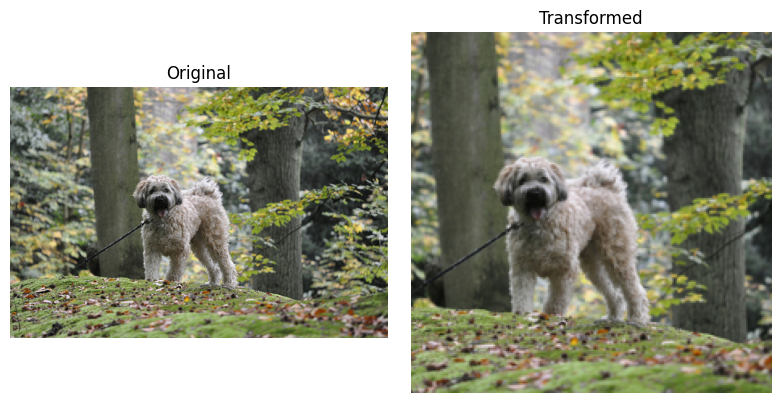

Augmented images:
Performing data augmentation


AttributeError: 'Compose' object has no attribute 'mean'

In [47]:

from augmentation import make_visualizable, make_base_transform, augment
%reload_ext autoreload
%autoreload 2

import os

import matplotlib.pyplot as plt
from PIL import Image


def show_images_side_by_side(original: Image.Image, augmented: Image.Image):
    """
    Display original and augmented PIL images side by side using matplotlib
    """
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original)
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(augmented)
    axes[1].set_title('Transformed')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()


def show(num_images_to_show: int, augmented: bool):
    image_dir = "data/oxford-iiit-pet/images"
    architecture = "resnet50"

    # Collect image file paths
    image_paths = [
        os.path.join(image_dir, fname)
        for fname in os.listdir(image_dir)
        if fname.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))
    ]
    base_transform = make_visualizable(make_base_transform(architecture))
    transform = base_transform
    if augmented:
        transform = augment(transform)

    # Show each original and augmented pair
    for img_path in image_paths[: num_images_to_show]:
        original = Image.open(img_path).convert('RGB')
        augmented = transform(original)
        show_images_side_by_side(original, augmented)


print("Non-augmented images:")
show(num_images_to_show=1, augmented=False)
print("Augmented images:")
show(num_images_to_show=20, augmented=True)
